In [3]:
%matplotlib widget

In [4]:
%cd ..

d:\Users\NitroPC\Documents\Python\ConcursoModelizacion2023


In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from gradient_descent import Environment, Agent, ConstrainedLoss, CostLoss, DistanceLoss, optimize
from utils import plot_location

In [6]:
K=35
dt = 1.
g = 0.1
m = 10.
F_max = 11.
p_0 = np.array([50., 50., 100.])
v_0 = np.array([-10., 0., -10.])
alpha = 0.5
gamma = 1.

In [7]:
agent = Agent(K)
env = Environment(dt, gamma, g, m, p_0, v_0)

In [27]:
optim = torch.optim.RMSprop(agent.parameters(), lr=1e-3)
loss = ConstrainedLoss(dt, gamma, F_max, alpha)

In [28]:
optimize(env, agent, loss, optim, iters=400)

2778.024169921875
2765.0146484375
2766.826416015625
2764.87548828125


In [56]:
f = agent()
p, v = env(f)

In [30]:
loss(f, p, v)

tensor(2765.0322, grad_fn=<AddBackward0>)

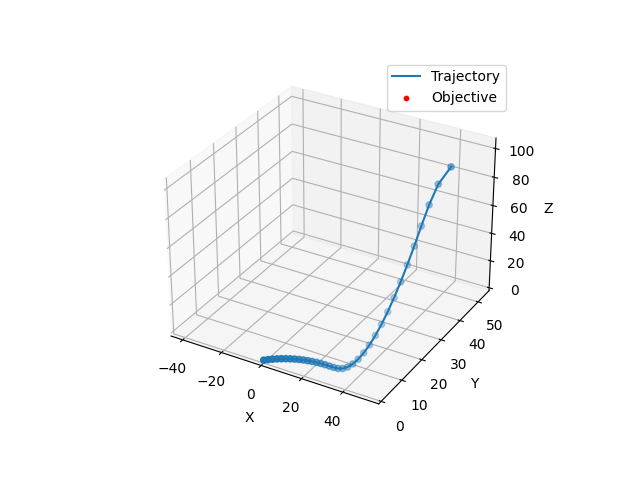

In [31]:
plot_location(p,v)

In [57]:
lambd = 1.
p2 = p + lambd*v

In [74]:
p_combine = torch.stack([p, p2]).transpose(1, 0)

In [75]:
p_combine.shape

torch.Size([35, 2, 3])

In [76]:
p_ = p_combine.detach().numpy()

In [77]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

In [78]:
lines = Line3DCollection(p_)


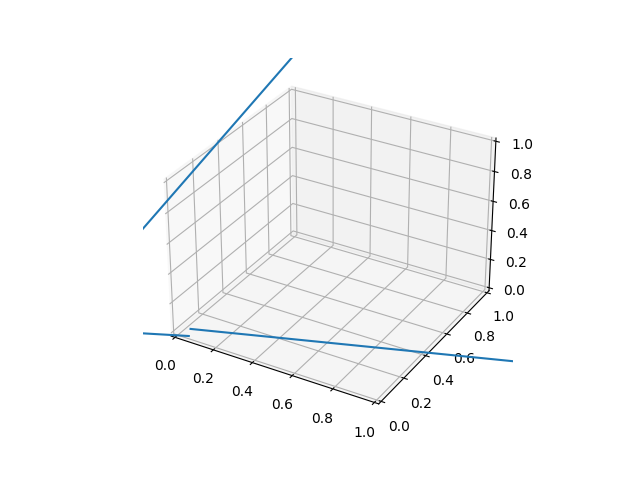

In [79]:
ax = plt.figure().add_subplot(projection='3d')

ax.add_collection(lines)